# Intro

This notebook is intended to provide data exploration for all datasets concerning this Lateralization study. As the moment, the datasets impemented are:
* USILaughs
* MWC2022 study

More should follow

# MWC 2022

## Sleep Info

For the moment, I shall consider the self-reports for the sleep data.

In [3]:
from pandas import read_csv, to_datetime

In [4]:
experiment_info = read_csv('../data/all_experimento_info.csv', index_col=[0,1])
experiment_info['bed_time'] = experiment_info['bed_time'].apply(to_datetime)
experiment_info['wake_up_time'] = experiment_info['wake_up_time'].apply(to_datetime)
experiment_info['bed_time'] = experiment_info['bed_time'].dt.tz_localize('Europe/Rome')
experiment_info['wake_up_time'] = experiment_info['wake_up_time'].dt.tz_localize('Europe/Rome')

At the moment, I am excluding sessions with weird bed and wake up times, since they do not make sense.

In [5]:
weird_times_mask = (
    (
        experiment_info["bed_time"].apply(lambda x: x.time())
        < to_datetime("15:00:00").time()
    )
    & (
        experiment_info["bed_time"].apply(lambda x: x.time())
        > to_datetime("10:00:00").time()
    )
) | (
    (
        experiment_info["wake_up_time"].apply(lambda x: x.time())
        < to_datetime("02:00:00").time()
    )
    & (
        experiment_info["wake_up_time"].apply(lambda x: x.time())
        > to_datetime("15:00:00").time()
    )
)
experiment_info[weird_times_mask]


index                  bed_time latency  \
participant_id Date                                                  
U06            2022-11-23     99 2022-11-23 13:00:41+01:00     5.0   
U08            2022-12-07    258 2022-12-07 12:29:55+01:00     0.0   
U11            2022-11-28    285 2022-11-28 12:30:32+01:00     5.0   
               2022-12-08    295 2022-12-08 13:00:43+01:00     4.0   

                                       wake_up_time awakening  \
participant_id Date                                             
U06            2022-11-23 2022-11-23 08:02:14+01:00       2.0   
U08            2022-12-07 2022-12-07 08:00:06+01:00       0.0   
U11            2022-11-28 2022-11-28 05:45:50+01:00       0.0   
               2022-12-08 2022-12-08 21:32:55+01:00       0.0   

                          awakening_duration disturbance_reasons  recovery  \
participant_id Date                                                          
U06            2022-11-23           00:01:00                cold       8.0   
U08            2022-12-07           00:00:00                  No       4.0   
U11            2022-11-28           00:00:00                  no       3.0   
               2022-12-08           00:00:00                  no       6.0   

                           sleep_quality                  morning_comments  \
participant_id Date                                                          
U06            2022-11-23            7.0                           nothing   
U08            2022-12-07            6.0                                No   
U11            2022-11-28            9.0  slept in the same bed with my bf   
               2022-12-08            8.0  I slept in the same bed as my bf   

                               actual_bed_time  
participant_id Date                             
U06            2022-11-23  2022-11-22 13:05:41  
U08            2022-12-07  2022-12-06 12:29:55  
U11            2022-11-28  2022-11-27 12:35:32  
               2022-12-08  2022-12-07 13:04:43

In [6]:
experiment_info = experiment_info[~weird_times_mask]

In [7]:
experiment_info.sort_index()

index                  bed_time latency  \
participant_id Date                                                  
U01            2022-11-22    163 2022-11-22 01:46:00+01:00      15   
               2022-11-23    165 2022-11-23 02:00:00+01:00       5   
               2022-11-24    167 2022-11-24 01:00:00+01:00      10   
               2022-11-25    169 2022-11-25 00:30:00+01:00      10   
               2022-11-26    171 2022-11-26 23:30:00+01:00      10   
...                          ...                       ...     ...   
U13            2022-12-19     44 2022-12-19 23:07:51+01:00    10.0   
               2022-12-20     45 2022-12-20 23:30:37+01:00    10.0   
               2022-12-21     46 2022-12-21 03:12:22+01:00    10.0   
               2022-12-22     47 2022-12-22 23:05:00+01:00     4.0   
               2022-12-23     48 2022-12-23 23:18:18+01:00     3.0   

                                       wake_up_time awakening  \
participant_id Date                                             
U01            2022-11-22 2022-11-22 07:30:00+01:00         3   
               2022-11-23 2022-11-23 07:00:00+01:00         2   
               2022-11-24 2022-11-24 07:30:00+01:00         3   
               2022-11-25 2022-11-25 05:15:00+01:00         3   
               2022-11-26 2022-11-26 07:00:00+01:00         3   
...                                             ...       ...   
U13            2022-12-19 2022-12-19 07:38:01+01:00       3.0   
               2022-12-20 2022-12-20 07:40:47+01:00       2.0   
               2022-12-21 2022-12-21 06:48:31+01:00       1.0   
               2022-12-22 2022-12-22 08:02:07+01:00       1.0   
               2022-12-23 2022-12-23 08:04:28+01:00       0.0   

                          awakening_duration  \
participant_id Date                            
U01            2022-11-22                 15   
               2022-11-23                NaN   
               2022-11-24                NaN   
               2022-11-25                NaN   
               2022-11-26                NaN   
...                                      ...   
U13            2022-12-19           00:47:00   
               2022-12-20           00:25:00   
               2022-12-21           00:16:00   
               2022-12-22           00:09:00   
               2022-12-23           00:00:00   

                                                         disturbance_reasons  \
participant_id Date                                                            
U01            2022-11-22                                                NaN   
               2022-11-23                                                NaN   
               2022-11-24                                                NaN   
               2022-11-25                                                NaN   
               2022-11-26                                feeling too hot (1)   
...                                                                      ...   
U13            2022-12-19                       Could not sleep for headache   
               2022-12-20                                   Not feeling well   
               2022-12-21  Worked before going to sleep. Very cold in the...   
               2022-12-22                                               Nope   
               2022-12-23                                               Nope   

                           recovery  sleep_quality          morning_comments  \
participant_id Date                                                            
U01            2022-11-22       6.0            4.0                       NaN   
               2022-11-23       3.0            6.0                       NaN   
               2022-11-24       7.0            6.0                       NaN   
               2022-11-25       3.0            4.0                       NaN   
               2022-11-26       9.0            6.0  slept in a different bed   
...                             ...         

## Physiological Data

In [8]:
from pandas import read_csv, read_parquet
from glob import glob
from collections import defaultdict
from pandas import Series
from tqdm import tqdm
from plotly.subplots import make_subplots
from plotly.graph_objects import Figure, Scatter
from random import choice as choose_randomly
from pandas import Timestamp
from pandas.core.indexes.base import Index
from tqdm.notebook import tqdm
from pandas import DataFrame, IndexSlice
from gc import collect as garbage_collect

In [9]:
eda_data_base_path: str = "../data/filtered/*/EDA/*.parquet"
eda_data_paths: list[str] = glob(eda_data_base_path)

In [10]:
eda_data: defaultdict[str, defaultdict[str, Series]] = defaultdict(lambda: defaultdict())
for file in tqdm(eda_data_paths, desc='Loading EDA data'):
    side_name = file.split("/")[-3]
    user_name = file.split("/")[-1].split(".")[0]
    eda_data[side_name][user_name] = read_parquet(file)

Loading EDA data:   0%|          | 0/19 [00:00<?, ?it/s]

In [11]:
bvp_data_base_path: str = "../data/filtered/*/BVP/*.parquet"
bvp_data_paths: list[str] = glob(bvp_data_base_path)
bvp_data = None

In [37]:
bvp_data: defaultdict[str, defaultdict[str, Series]] = defaultdict(lambda: defaultdict())
for file in tqdm(bvp_data_paths, desc='Loading BVP data'):
    side_name = file.split("/")[-3]
    user_name = file.split("/")[-1].split(".")[0]
    bvp_data[side_name][user_name] = read_parquet(file)

Loading BVP data:   0%|          | 0/19 [00:00<?, ?it/s]

In [12]:
physiological_data: dict[str, defaultdict[str, defaultdict[str, Series]]] = {
    "EDA": eda_data,
    "BVP": bvp_data,
}
del eda_data
del bvp_data
garbage_collect()

778

In [13]:
physiological_data['EDA']['right']['U13']

mixed-EDA  phasic-EDA
session    timestamp                                              
2022-11-17 2022-11-17 00:29:38+01:00         -0.356251   -0.179237
           2022-11-17 00:29:38.250000+01:00  -0.333540   -0.179237
           2022-11-17 00:29:38.500000+01:00  -0.311632   -0.131899
           2022-11-17 00:29:38.750000+01:00  -0.295311   -0.090009
           2022-11-17 00:29:39+01:00         -0.284433   -0.067429
...                                                ...         ...
2022-12-22 2022-12-22 08:10:29.750000+01:00  -0.717994    3.498308
           2022-12-22 08:10:30+01:00         -0.727297    3.469839
           2022-12-22 08:10:30.250000+01:00  -0.732028    3.448389
           2022-12-22 08:10:30.500000+01:00  -0.736577    3.433078
           2022-12-22 08:10:30.750000+01:00  -0.740937    3.343001

[4410792 rows x 2 columns]

In [10]:
# from pandas import Timedelta, to_datetime


# def make_biometrics_plots_together_plotly(
#     data: defaultdict[str, defaultdict[str, defaultdict[str, Series]]],
#     user_id: str,
#     session_ids: dict[str, str],
#     experiment_info: DataFrame,
#     **kwargs
# ) -> None:
#     fig = make_subplots(rows=len(data.keys()), cols=1, shared_xaxes=True)

#     for n, (data_type, physiological_data) in tqdm(
#         enumerate(data.items()), desc="Plotting data", total=len(data.keys())
#     ):
#         for side, specific_side_data in physiological_data.items():
#             user_data: DataFrame = specific_side_data[user_id]

#             if data_type == "EDA":
#                 eda_type: str = kwargs["eda_type"]
#                 data_to_plot = user_data[eda_type]
#             else:
#                 data_to_plot = user_data.iloc[:, 0]

#             data_to_plot = data_to_plot.loc[IndexSlice[session_ids[side], :]]

#             fig.add_trace(
#                 Scatter(
#                     x=data_to_plot.index,
#                     y=data_to_plot.values,
#                     mode="lines",
#                     name=side,
#                 ),
#                 row=n + 1,
#                 col=1,
#             )

#             # del data_to_plot
#             # garbage_collect()

#         session_id_corrected: Timestamp = to_datetime(session_ids["left"].split("-")[0], format='%y%m%d') + Timedelta(
#             "1D"
#         )
#         session_id_corrected: str = str(session_id_corrected.date())
#         start_exp = Timestamp(
#             experiment_info.loc[
#                 IndexSlice[user_id, session_id_corrected], "actual_bed_time"
#             ]
#         )
#         end_exp = Timestamp(
#             experiment_info.loc[
#                 IndexSlice[user_id, session_id_corrected], "wake_up_time"
#             ]
#         )
#         start_exp = start_exp.tz_localize("Europe/Rome")
#         end_exp = end_exp.tz_localize("Europe/Rome")

#         fig.add_vrect(
#             x0=start_exp,
#             x1=end_exp,
#             fillcolor="#828282",
#             opacity=0.3,
#             line_width=0,
#             name="experiment time",
#             row=n + 1,
#             col=1,
#         )

#     fig.update_layout(autosize=False, width=800, height=1600)
#     fig.show()


# user_id = "U13"
# session_ids = {"left": "221129-221810", "right": "221129-221752"}

# make_biometrics_plots_together(
#     data=physiological_data,
#     user_id=user_id,
#     session_ids=session_ids,
#     experiment_info=experiment_info,
#     eda_type="phasic-EDA",
# )


In [99]:
from pandas import Timedelta, to_datetime
from matplotlib.pyplot import subplots, savefig, show, legend

subset_data: bool = False

def make_biometrics_plots_together_matplotlib(
    data: defaultdict[str, defaultdict[str, defaultdict[str, Series]]],
    user_id: str,
    session_id: str,
    experiment_info: DataFrame,
    **kwargs
) -> None:
    data = {key: val for key, val in data.items() if val is not None}
    fig, axs = subplots(len(data.keys()), 1, figsize=(14, 11 * len(data.keys())), sharex=True)
    if len(data.keys()) == 1:
        axs = [axs]

    for n, (data_type, physiological_data) in tqdm(
        enumerate(data.items()), desc="Plotting data", total=len(data.keys())
    ):
        if physiological_data is None:
            continue
        
        for side, specific_side_data in physiological_data.items():
            user_data: DataFrame = specific_side_data[user_id]

            if data_type == "EDA":
                eda_type: str = kwargs["eda_type"]
                data_to_plot = user_data[eda_type]
            else:
                data_to_plot = user_data.iloc[:, 0]

            data_to_plot = data_to_plot.loc[IndexSlice[session_id, :]]
            if subset_data: 
                data_to_plot = data_to_plot[:1000]

            data_to_plot.index = to_datetime(data_to_plot.index)
            axs[n].plot(
                data_to_plot.index,
                data_to_plot.values,
                label=side,
                linestyle='-',
            )
            axs[n].set_title(data_type)

            # del data_to_plot
            # garbage_collect()

        # session_id_corrected: Timestamp = to_datetime(
        #     session_ids["left"].split("-")[0], format="%y%m%d"
        # )  + Timedelta("1D")
        # session_id_corrected: str = str(session_id_corrected.date())
        
        start_exp = Timestamp(
            experiment_info.loc[
                IndexSlice[user_id, session_id], "actual_bed_time"
            ]
        )
        end_exp = Timestamp(
            experiment_info.loc[
                IndexSlice[user_id, session_id], "wake_up_time"
            ]
        )
        start_exp = start_exp.tz_localize("Europe/Rome")
        end_exp = end_exp.tz_localize("Europe/Rome")

        
        axs[n].axvspan(xmin=start_exp, 
                        xmax=end_exp, 
                        color='#828282', 
                        alpha=0.3, 
                        label='sleep time')
        axs[n].set_ylabel(f'Time')
        axs[n].set_ylabel(f'{data_type}')

    handles, labels = axs[-1].get_legend_handles_labels()
    fig.legend(handles, 
               labels, 
               fontsize='x-large', 
               title='Side', 
               title_fontsize='xx-large', 
               loc=(0.801, 0.92))
    # legend()
    fig.suptitle(f'Plots for all singals for user {user_id}, session {session_id}', fontsize=30, y=0.97)
    savefig(f'../visualizations/{user_id}_{session_id}.pdf')
    show()
    
    return start_exp, end_exp

import ipywidgets as widgets

users_left = physiological_data["EDA"]["left"].keys()
users_right = physiological_data["EDA"]["right"].keys()
users = list(set(users_left) & set(users_right))

user_selection = widgets.Dropdown(
    options=sorted(users),
    value=users[0],
    description='User:',
    disabled=False,
)
display(user_selection)

Dropdown(description='User:', options=('U01', 'U02', 'U03', 'U04', 'U06', 'U09', 'U10', 'U13'), value='U01')

In [100]:
user = user_selection.value

sessions_right = physiological_data["EDA"]["left"][user].index.get_level_values(0).unique()
sessions_left = physiological_data["EDA"]["right"][user].index.get_level_values(0).unique()
sessions = list(set(sessions_right) & set(sessions_left))
    
if user not in experiment_info.index.get_level_values(0).unique():
    print(f'{user} not in experiment info. Skipping')
morning_survey_sessions = experiment_info.loc[IndexSlice[user, :], :].index.get_level_values(1).unique()


sessions_all = list(set(sessions) & set(morning_survey_sessions))
if len(sessions_all) == 0:
    raise ValueError(f'No sessions for user {user} found')
session_selection = widgets.Dropdown(
    options=sorted(sessions_all),
    value=sessions_all[0],
    description='Session:',
    disabled=False,)
display(session_selection)

Dropdown(description='Session:', index=3, options=('2022-11-18', '2022-11-19', '2022-11-20', '2022-11-21', '20…

Plotting data:   0%|          | 0/1 [00:00<?, ?it/s]

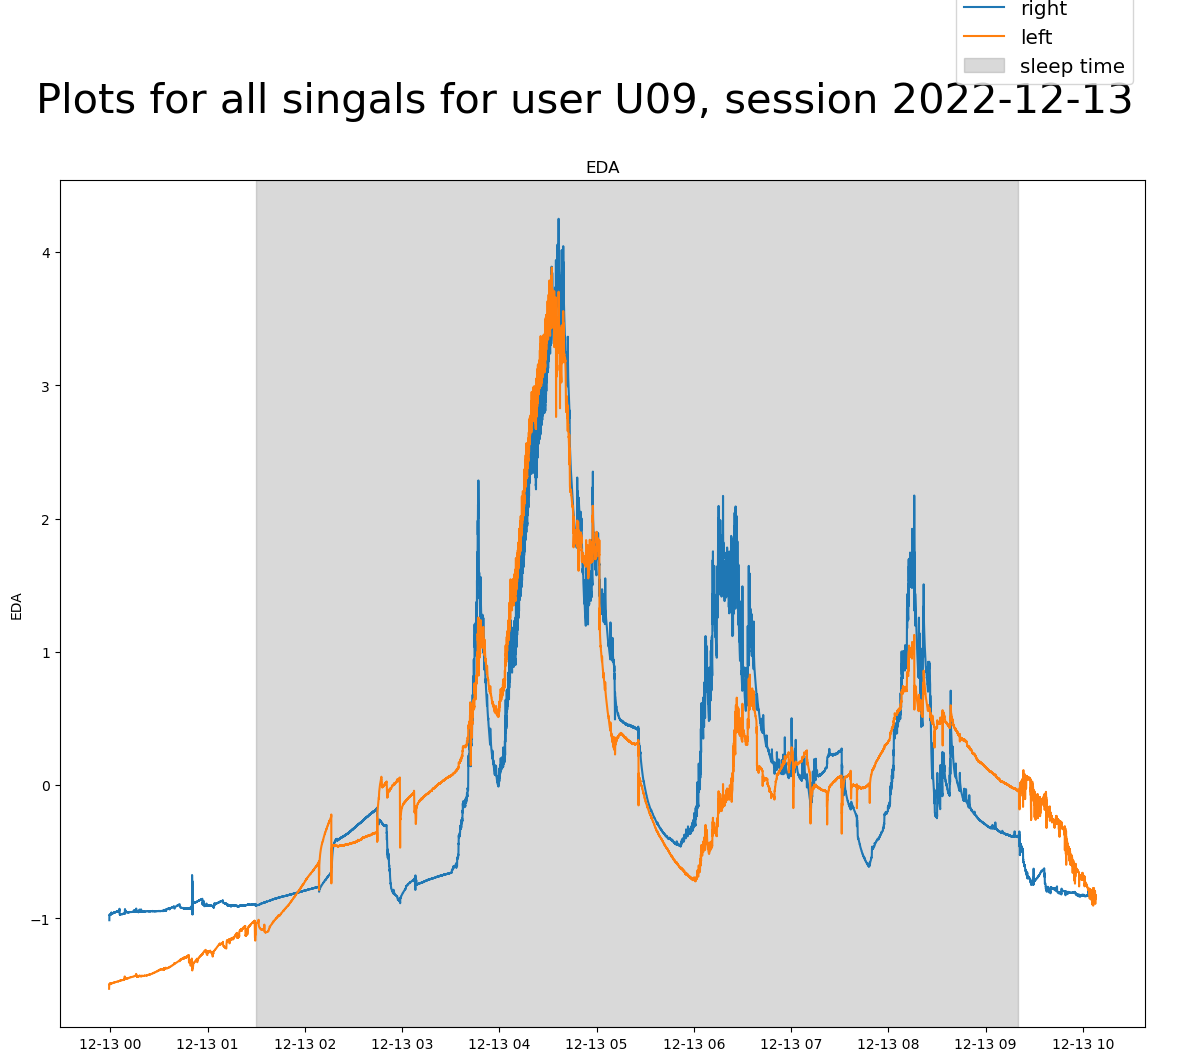

(Timestamp('2022-12-13 01:30:00+0100', tz='Europe/Rome'),
 Timestamp('2022-12-13 09:20:00+0100', tz='Europe/Rome'))

In [101]:
session = session_selection.value
    
make_biometrics_plots_together_matplotlib(
    data=physiological_data,
    user_id=user,
    session_id=session,
    experiment_info=experiment_info,
    eda_type="mixed-EDA",
)


In [102]:
dataset_exloration = {}
for user in tqdm(sorted(users), desc='Exploring dataset'):
    sessions_right = physiological_data["EDA"]["left"][user].index.get_level_values(0).unique()
    sessions_left = physiological_data["EDA"]["right"][user].index.get_level_values(0).unique()
    sessions = list(set(sessions_right) & set(sessions_left))
    
    if user not in experiment_info.index.get_level_values(0).unique():
        print(f'{user} not in experiment info. Skipping')
        continue
    morning_survey_sessions = experiment_info.loc[IndexSlice[user, :], :].index.get_level_values(1).unique()
    
    sessions_all = list(set(sessions) & set(morning_survey_sessions))
    dataset_exloration[user] = {'lx & rx': len(sessions), 
                                'lx': len(sessions_left),
                                'rx': len(sessions_right),
                                'm_survey': len(morning_survey_sessions),
                                'lx & rx & m_survey': len(sessions_all),
                                }
    


Exploring dataset:   0%|          | 0/8 [00:00<?, ?it/s]

In [103]:
dataset_exloration = DataFrame(dataset_exloration)
display(dataset_exloration)

,U01,U02,U03,U04,U06,U09,U10,U13
lx & rx,12,0,17,14,8,19,7,33
lx,13,1,17,15,9,22,10,36
rx,12,19,17,14,11,19,8,33
m_survey,18,24,24,18,8,22,25,37
lx & rx & m_survey,10,0,16,11,4,19,7,33


<Axes: ylabel='lx & rx & m_survey'>

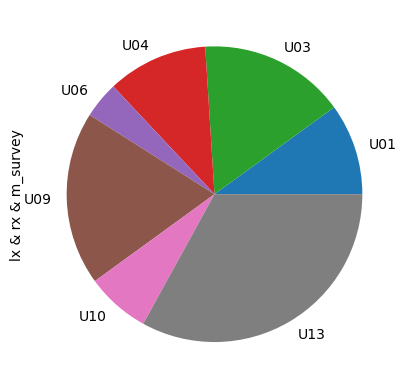

In [104]:
dataset_exloration.T['lx & rx & m_survey'].plot(kind='pie')

# Segmentation

In [14]:
def remove_usr_from_idx(df: DataFrame, key: str) -> DataFrame:
    df = df.loc[IndexSlice[key, :], :]
    df.index = df.index.droplevel(0)
    return df
    
experiment_info_as_dict = {participant: remove_usr_from_idx(df=experiment_info, key=participant)
                           for participant in list(experiment_info.index.get_level_values(0).unique())}

In [15]:
segment_size_in_mins = 10
segment_size_in_secs = segment_size_in_mins * 60
eda_sample_rate = 4
segment_size_in_sampling_rate: int = segment_size_in_secs * eda_sample_rate

In [23]:
eda_data = physiological_data['EDA']

In [17]:
# user = "U13"
# info = experiment_info_as_dict[user]
# data = eda_data['left'][user]

In [33]:
from numpy import nan, ndarray
from pandas import Timedelta


def get_session_moment(start: Timestamp, end: Timestamp, info: Series) -> int | float:
    # this method gives 0 if the person is awake and 1 if the person is
    if (start < info["bed_time"] and end < info["bed_time"]) or (
        start > info["wake_up_time"] and end > info["wake_up_time"]
    ):
        return 0
    elif (start < info["bed_time"] and end > info["bed_time"]) or (
        start < info["wake_up_time"] and end > info["wake_up_time"]
    ):
        return nan
    else:
        return 1


data_segmented_left: list[tuple] = []
data_segmented_right: list[tuple] = []
users = list(set(eda_data["left"].keys()) & set(eda_data["right"].keys()))


for user in users:
    data_left = eda_data["left"][user]
    data_right = eda_data["right"][user]
    info = experiment_info_as_dict[user]
    sessions = list(
        set(data_left.index.get_level_values(0).unique())
        & set(data_right.index.get_level_values(0).unique())
    )
    morning_survey_sessions = (
        experiment_info.loc[IndexSlice[user, :], :].index.get_level_values(1).unique()
    )

    sessions_all = list(set(sessions) & set(morning_survey_sessions))

    for session in tqdm(sessions_all, desc=f"Splitting {user=}. Sessions progress:"):
        session_data_left: DataFrame = data_left.loc[IndexSlice[session, :], :]
        session_data_right: DataFrame = data_right.loc[IndexSlice[session, :], :]

        session_info = info.loc[session, :]

        starts_left = session_data_left[
            ::segment_size_in_sampling_rate
        ].index.get_level_values(1)
        starts_right = session_data_right[
            ::segment_size_in_sampling_rate
        ].index.get_level_values(1)

        ends_left = (
            session_data_left[::segment_size_in_sampling_rate].index.get_level_values(1)
            + Timedelta(f"{segment_size_in_mins}min")
            - Timedelta(f"{1/eda_sample_rate}s")
        )
        ends_right = (
            session_data_right[::segment_size_in_sampling_rate].index.get_level_values(
                1
            )
            + Timedelta(f"{segment_size_in_mins}min")
            - Timedelta(f"{1/eda_sample_rate}s")
        )

        segments_left = [
            (
                session_data_left.loc[
                    IndexSlice[session, start:end],
                    "mixed-EDA",
                ].values,
                get_session_moment(start, end, session_info),
            )
            for start, end in zip(starts_left, ends_left)
        ]
        segments_right = [
            (
                session_data_right.loc[
                    IndexSlice[session, start:end],
                    "mixed-EDA",
                ].values,
                get_session_moment(start, end, session_info),
            )
            for start, end in zip(starts_right, ends_right)
        ]
        data_segmented_left.append(segments_left)
        data_segmented_right.append(segments_right)


Splitting user='U02'. Sessions progress:: 0it [00:00, ?it/s]

Splitting user='U13'. Sessions progress::   0%|          | 0/33 [00:00<?, ?it/s]

Splitting user='U10'. Sessions progress::   0%|          | 0/7 [00:00<?, ?it/s]

Splitting user='U06'. Sessions progress::   0%|          | 0/4 [00:00<?, ?it/s]

Splitting user='U09'. Sessions progress::   0%|          | 0/19 [00:00<?, ?it/s]

Splitting user='U03'. Sessions progress::   0%|          | 0/16 [00:00<?, ?it/s]

Splitting user='U04'. Sessions progress::   0%|          | 0/11 [00:00<?, ?it/s]

Splitting user='U01'. Sessions progress::   0%|          | 0/10 [00:00<?, ?it/s]

In [36]:
data_segmented_left[0][0]

(array([-1.43763099, -1.34308514, -1.26062914, ..., -1.12697309,
        -1.13063412, -1.13110145]),
 0)

In [48]:
values_left = [
    val[0]
    for segments in data_segmented_left
    for val in segments
]
values_right = [
    val[0]
    for segments in data_segmented_right
    for val in segments
]

labels_left = [
    val[1]
    for segments in data_segmented_left
    for val in segments
]
labels_right = [
    val[1]
    for segments in data_segmented_right
    for val in segments
]
